In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
filename = 'data/lens_z_omlambda0_2.csv'
# filename = 'data/dopri5_lens_z_omlambda_0.0.csv'
# filename = 'data/lens_z_omlambda0_2_bigger_redshift.csv'
df = pd.read_csv(filename)
df.head()

,lens_z,percentage_err,step
0,0.050000,-0.003992,1.000000e-07
1,0.066667,-0.001698,1.000000e-07
2,0.083333,-0.000673,1.000000e-07
3,0.100000,-0.002078,1.000000e-07
4,0.116667,0.000805,1.000000e-07


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
stats

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
1.000000e-08,-0.000498,0.001656,10,0.000524
1.210526e-08,-0.000565,0.001626,10,0.000514
1.421053e-08,-0.000436,0.001684,10,0.000533
1.631579e-08,-0.000520,0.001658,10,0.000524
1.842105e-08,-0.000517,0.001639,10,0.000518
2.052632e-08,-0.000521,0.001640,10,0.000519
2.263158e-08,-0.000552,0.001660,10,0.000525
2.473684e-08,-0.000549,0.001633,10,0.000516
2.684211e-08,-0.000422,0.001755,10,0.000555


In [5]:
# stats[stats['percentage_err mean'].abs() == stats['percentage_err mean'].abs().min()]
best_step_size = stats['percentage_err mean'].abs().idxmin()
print("This is the step size that gives the most accurate result: ", best_step_size)
print("This step size has mean of ", stats['percentage_err mean'].abs().min())

This is the step size that gives the most accurate result:  4.67346938776e-07
This step size has mean of  5.77251880363e-06


In [6]:
stats[stats.index > 6e-7]

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
6.020408e-07,-0.001341,0.005327,10,0.001685
6.102041e-07,-0.000881,0.008128,10,0.002570
6.142857e-07,-0.000265,0.003899,10,0.001233
6.183673e-07,0.000723,0.005517,10,0.001745
6.265306e-07,-0.000381,0.005704,10,0.001804
6.326531e-07,0.001435,0.005164,10,0.001633
6.346939e-07,-0.000618,0.006272,10,0.001983
6.428571e-07,0.001240,0.004742,10,0.001499
6.510204e-07,0.000254,0.006573,10,0.002079


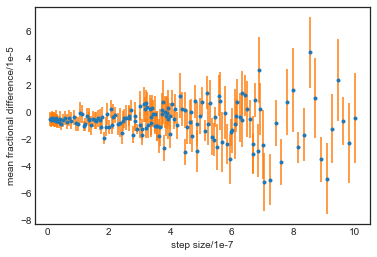

In [7]:
# new_stats = stats[stats.index< 10e-7]
new_stats = stats
plt.plot(new_stats.index.values/1e-7, new_stats['percentage_err mean'].values/100/1e-5, '.')
plt.errorbar(new_stats.index.values/1e-7, new_stats['percentage_err mean'].values/100/1e-5, yerr=new_stats['percentage_err mean std'].abs().values/100/1e-5, linestyle='none')
plt.xlabel('step size/1e-7')
plt.ylabel('mean fractional difference/1e-5')

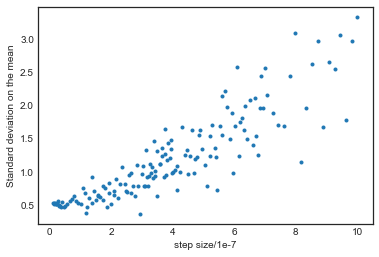

In [8]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values/100/1e-5, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('Standard deviation on the mean')

In [9]:
# filename = 'data/mass_omlambda_0.0.csv'
# df = pd.read_csv(filename)
# df.drop_duplicates(inplace=True)
# stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
# stats.columns = [' '.join(col).strip() for col in stats.columns.values]
# stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
# stats

In [10]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('mean percentage difference')

In [11]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('Standard deviation on the mean')